In [1]:
import   numpy

import copy
import scipy.special

import matplotlib.pyplot as plt

import random

%matplotlib inline

In [2]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10


In [3]:
class individual:
    def __init__(self,inputnodes,hiddennodes,outputnodes):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        self.score = 0
    
        

In [4]:
eva = []

for i in range(20):
    unit = individual(input_nodes,hidden_nodes,output_nodes)
    eva.append(unit)
    

In [5]:
training_data_file = open("mnist_dataset/mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
class neuralNetwork:
    
    def __init__(self,wih,who):
        
        self.wih = wih
        self.who = who

        self.activation_function = lambda x:scipy.special.expit(x)
        
        pass
    
    
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [7]:
epochs = 500 #最大进化代数
mut_p =0.3718#基因突变概率
scores = []
for e in range(epochs):
    print("当前为第",e,"代：")
    for i in eva:
        #得到各子体的得分
        n=neuralNetwork(i.wih,i.who)
        
        scorecard = []

        for record in test_data_list:
            all_values = record.split(',')
            correct_label = int(all_values[0])
            inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
            outputs = n.query(inputs)

            label = numpy.argmax(outputs)
            if (label == correct_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
                pass
            pass
        scorecard_array = numpy.asarray(scorecard)
        performance = scorecard_array.sum()/scorecard_array.size
        i.score = performance
    #按照得分排序
    eva.sort(key=lambda x:(x.score))
    for i in eva:      
        print(i.score)
    #淘汰后10个
    for i in range(10):      
        eva.pop(0)
    scores.append(eva[9].score)
#     print("本代最高得分是：",eva[9].score,"\n")
    if e!=epochs-1:
        #杂交(两点交叉)
        breakpoint1 = random.randint(0,hidden_nodes)
        breakpoint2 = random.randint(0, hidden_nodes)

        breakpoint3 = random.randint(0, output_nodes)
        breakpoint4 = random.randint(0, output_nodes)
        if breakpoint2 < breakpoint1:
            temp = breakpoint1
            breakpoint1 = breakpoint2
            breakpoint2 = temp
        if breakpoint3 < breakpoint4:
            temp = breakpoint3
            breakpoint3 = breakpoint4
            breakpoint4 = temp
        #是否变异
        r = random.random()
        if epochs%2 == 0: #偶数轮，变异偶数，相隔抽取
            if r < mut_p:#有变异
                #生成5个杂交体
                for j in range(5):
                    hybrid_indi = copy.deepcopy(eva[j])
                    for k in range(breakpoint1,breakpoint2):
                        hybrid_indi.wih[k] = eva[9-j].wih[k]
                    for k in range(breakpoint3,breakpoint4):
                        hybrid_indi.who[k] = eva[9-j].who[k]
                    eva.append(hybrid_indi)
                #生成5个突变体 
                for j in range(5):
                    mut_indi = copy.deepcopy(eva[2*j])
                    noise = numpy.random.normal(0.0,pow(input_nodes,-0.5),(hidden_nodes,input_nodes))*0.0272
                    mut_indi.wih +=noise
                    noise = numpy.random.normal(0.0,pow(hidden_nodes,-0.5),(output_nodes,hidden_nodes))*0.0272
                    mut_indi.who +=noise
                    eva.append(mut_indi)

            else:
                 #生成10个杂交体
                for j in range(10):
                    hybrid_indi = copy.deepcopy(eva[j])
                    for k in range(breakpoint1,breakpoint2):
                        hybrid_indi.wih[k] = eva[(j+2)%10].wih[k]
                    for k in range(breakpoint3,breakpoint4):
                        hybrid_indi.who[k] = eva[(j+2)%10].who[k]
                    eva.append(hybrid_indi)



        if epochs%2 == 1:#奇数轮，变异奇数，相邻抽取
            if r < mut_p:
                #生成5个杂交体
                for j in range(5):
                    hybrid_indi = copy.deepcopy(eva[2*j])
                    for k in range(breakpoint1,breakpoint2):
                        hybrid_indi.wih[k] = eva[2*j+1].wih[k]
                    for k in range(breakpoint3,breakpoint4):
                        hybrid_indi.who[k] = eva[2*j+1].who[k]
                    eva.append(hybrid_indi)
                #生成5个突变体 
                for j in range(5):
                    mut_indi = copy.deepcopy(eva[2*j+1])
                    noise = numpy.random.normal(0.0,pow(input_nodes,-0.5),(hidden_nodes,input_nodes))*0.0272
                    mut_indi.wih +=noise
                    noise = numpy.random.normal(0.0,pow(hidden_nodes,-0.5),(output_nodes,hidden_nodes))*0.0272
                    mut_indi.who +=noise
                    eva.append(mut_indi)

            else:
                #生成10个杂交体
                for j in range(10):
                    hybrid_indi = copy.deepcopy(eva[j])
                    for k in range(breakpoint1,breakpoint2):
                        hybrid_indi.wih[k] = eva[(j+1)%10].wih[k]
                    for k in range(breakpoint3,breakpoint4):
                        hybrid_indi.who[k] = eva[(j+1)%10].who[k]
                    eva.append(hybrid_indi)





当前为第 0 代：
0.0487
0.066
0.0892
0.0931
0.0955
0.0982
0.0982
0.1003
0.1007
0.1009
0.1009
0.1011
0.1024
0.1028
0.1028
0.1029
0.1071
0.1129
0.1213
0.1238
当前为第 1 代：
0.0998
0.1009
0.1009
0.1011
0.1013
0.1023
0.1024
0.1028
0.1028
0.1028
0.1028
0.1029
0.105
0.1071
0.1118
0.1129
0.1169
0.1213
0.1238
0.1787
当前为第 2 代：
0.1028
0.1028
0.1029
0.104
0.105
0.1068
0.1071
0.1074
0.1118
0.1129
0.1136
0.1141
0.1169
0.118
0.1213
0.1238
0.1268
0.1615
0.1719
0.1787
当前为第 3 代：
0.113
0.1136
0.1136
0.1137
0.1141
0.1164
0.1169
0.1174
0.118
0.1213
0.1221
0.1238
0.1268
0.1289
0.1299
0.1494
0.1615
0.1719
0.1731
0.1787
当前为第 4 代：
0.1221
0.1221
0.1238
0.1268
0.127
0.1289
0.1289
0.1299
0.1299
0.1337
0.1351
0.1381
0.1494
0.1494
0.1615
0.1615
0.1719
0.1719
0.1731
0.1787
当前为第 5 代：
0.1351
0.1381
0.1418
0.1424
0.1424
0.1442
0.1442
0.1494
0.1494
0.1593
0.1615
0.1615
0.1696
0.1718
0.1719
0.1719
0.1731
0.1751
0.1751
0.1787
当前为第 6 代：
0.1561
0.1615
0.1615
0.1678
0.1681
0.1696
0.1718
0.1719
0.1719
0.1719
0.1731
0.1731
0.1751
0.1751


0.2041
0.2046
0.2063
0.2067
0.2067
0.2068
0.2071
0.2071
0.2076
0.2078
0.2078
0.2082
0.2088
0.2089
0.209
0.2095
0.21
0.2104
0.2105
0.2108
当前为第 56 代：
0.2078
0.2079
0.208
0.2082
0.2087
0.2088
0.2089
0.209
0.209
0.209
0.2095
0.2095
0.21
0.21
0.2104
0.2104
0.2104
0.2105
0.2108
0.2108
当前为第 57 代：
0.2095
0.2095
0.2097
0.2097
0.21
0.21
0.2101
0.2101
0.2102
0.2104
0.2104
0.2104
0.2104
0.2104
0.2105
0.2105
0.2106
0.2106
0.2108
0.2108
当前为第 58 代：
0.2101
0.2104
0.2104
0.2104
0.2104
0.2104
0.2104
0.2105
0.2105
0.2105
0.2105
0.2106
0.2106
0.2106
0.2107
0.2107
0.2107
0.2108
0.2108
0.2108
当前为第 59 代：
0.2004
0.2011
0.2044
0.2081
0.2085
0.2102
0.2104
0.2104
0.2104
0.2105
0.2106
0.2106
0.2106
0.2107
0.2107
0.2107
0.2107
0.2108
0.2108
0.2108
当前为第 60 代：
0.2104
0.2105
0.2105
0.2106
0.2106
0.2106
0.2106
0.2107
0.2107
0.2107
0.2107
0.2107
0.2107
0.2108
0.2108
0.2108
0.2108
0.2108
0.2108
0.2109
当前为第 61 代：
0.21
0.2102
0.2106
0.2106
0.2107
0.2107
0.2107
0.2107
0.2107
0.2107
0.2108
0.2108
0.2108
0.2108
0.2108
0.2108

0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
当前为第 112 代：
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
当前为第 113 代：
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
当前为第 114 代：
0.2087
0.2102
0.2121
0.2123
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.2151
当前为第 115 代：
0.2149
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.2151
0.2151
当前为第 116 代：
0.2133
0.2134
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.2151
0.2151
0.2156
0.2156
当前为第 117 代：
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.215
0.2151
0.2151
0.2151
0.2151
0.2151
0.2155
0.2155
0.2156
0.2156
当前为第 118 代：
0.2111
0.2118
0.2118
0.2127
0.2138
0.2143
0.2148
0.21

0.2235
0.2239
0.2239
0.224
0.2241
0.2242
0.2242
0.2245
0.2247
0.2249
0.2251
0.2251
0.2252
0.2252
0.2253
0.2254
0.2254
0.2255
0.2258
0.2262
当前为第 168 代：
0.2029
0.2038
0.2176
0.2201
0.2205
0.2249
0.2251
0.2251
0.2251
0.2252
0.2252
0.2252
0.2253
0.2254
0.2254
0.2255
0.2258
0.2258
0.226
0.2262
当前为第 169 代：
0.2252
0.2252
0.2252
0.2252
0.2252
0.2253
0.2253
0.2254
0.2254
0.2254
0.2254
0.2255
0.2255
0.2258
0.2258
0.2258
0.226
0.2262
0.2262
0.2267
当前为第 170 代：
0.225
0.225
0.2253
0.2254
0.2255
0.2255
0.2256
0.2258
0.2258
0.2258
0.2258
0.2258
0.226
0.226
0.2261
0.2262
0.2262
0.2262
0.2264
0.2267
当前为第 171 代：
0.2178
0.2219
0.2229
0.2244
0.2253
0.2258
0.2258
0.226
0.226
0.2261
0.2262
0.2262
0.2262
0.2263
0.2264
0.2265
0.2265
0.2267
0.2268
0.2285
当前为第 172 代：
0.2252
0.2262
0.2262
0.2262
0.2262
0.2262
0.2262
0.2263
0.2264
0.2265
0.2265
0.2267
0.2267
0.2267
0.2268
0.2268
0.2268
0.2269
0.2284
0.2285
当前为第 173 代：
0.2262
0.2264
0.2265
0.2265
0.2265
0.2265
0.2267
0.2267
0.2267
0.2267
0.2267
0.2268
0.2268
0.2268

0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 223 代：
0.223
0.2265
0.2293
0.2304
0.2318
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 224 代：
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 225 代：
0.2228
0.2249
0.2281
0.2284
0.2287
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 226 代：
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 227 代：
0.2187
0.2262
0.2293
0.2297
0.231
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
当前为第 228 代：
0.2222
0.2233
0.2251
0.2285
0.229
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323
0.2323


0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 278 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 279 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 280 代：
0.2262
0.227
0.2331
0.2332
0.2347
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 281 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 282 代：
0.2284
0.2289
0.2308
0.232
0.2349
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 283 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354

0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 333 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 334 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 335 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 336 代：
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 337 代：
0.2194
0.2207
0.2263
0.2318
0.2319
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
当前为第 338 代：
0.226
0.2296
0.2314
0.2322
0.2331
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.2354
0.235

0.2305
0.2336
0.235
0.2364
0.2397
0.2399
0.24
0.24
0.24
0.2401
0.2401
0.2402
0.2402
0.2402
0.2403
0.2404
0.2405
0.2406
0.2408
0.2411
当前为第 388 代：
0.2284
0.2312
0.2338
0.2356
0.2374
0.2399
0.2399
0.24
0.2401
0.2402
0.2402
0.2402
0.2403
0.2404
0.2405
0.2405
0.2406
0.2408
0.2409
0.2411
当前为第 389 代：
0.2398
0.24
0.2401
0.2402
0.2402
0.2403
0.2403
0.2404
0.2404
0.2404
0.2405
0.2405
0.2405
0.2405
0.2406
0.2406
0.2408
0.2409
0.241
0.2411
当前为第 390 代：
0.2396
0.2401
0.2403
0.2404
0.2404
0.2405
0.2405
0.2405
0.2405
0.2405
0.2406
0.2406
0.2406
0.2408
0.2409
0.2409
0.241
0.2411
0.2411
0.2414
当前为第 391 代：
0.2294
0.2312
0.2346
0.2406
0.2406
0.2406
0.2406
0.2407
0.2408
0.2408
0.2409
0.2409
0.2409
0.241
0.241
0.2411
0.2411
0.2411
0.2414
0.2414
当前为第 392 代：
0.2306
0.2317
0.234
0.2393
0.2405
0.2406
0.2409
0.2409
0.2409
0.241
0.241
0.2411
0.2411
0.2411
0.2411
0.2412
0.2414
0.2414
0.2414
0.243
当前为第 393 代：
0.2407
0.2407
0.2408
0.2409
0.241
0.2411
0.2411
0.2411
0.2411
0.2411
0.2412
0.2412
0.2414
0.2414
0.2414
0.2

0.2468
0.2469
0.247
0.247
0.247
0.247
0.247
0.247
0.247
0.247
0.247
0.2471
0.2471
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 443 代：
0.2425
0.2432
0.2433
0.2451
0.2457
0.247
0.247
0.2471
0.2471
0.2471
0.2471
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 444 代：
0.2256
0.2335
0.2406
0.2423
0.2423
0.2471
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 445 代：
0.229
0.2392
0.242
0.2433
0.2447
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 446 代：
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 447 代：
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
当前为第 448 代：
0.247
0.247
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.2472
0.247

0.2376
0.2392
0.2413
0.245
0.2461
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
当前为第 498 代：
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
当前为第 499 代：
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474
0.2474


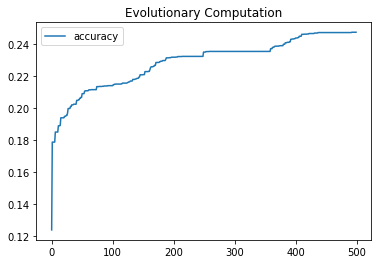

In [8]:
plt.plot(scores,label = "accuracy")
plt.title("Evolutionary Computation")
plt.legend()
# plt.savefig("Evolutionary Computation")
plt.show()